<ipython-input-20-7162660bc5f9>:23: FutureWarning: The provided callable <function mean at 0x7e456519d3a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = df.pivot_table(


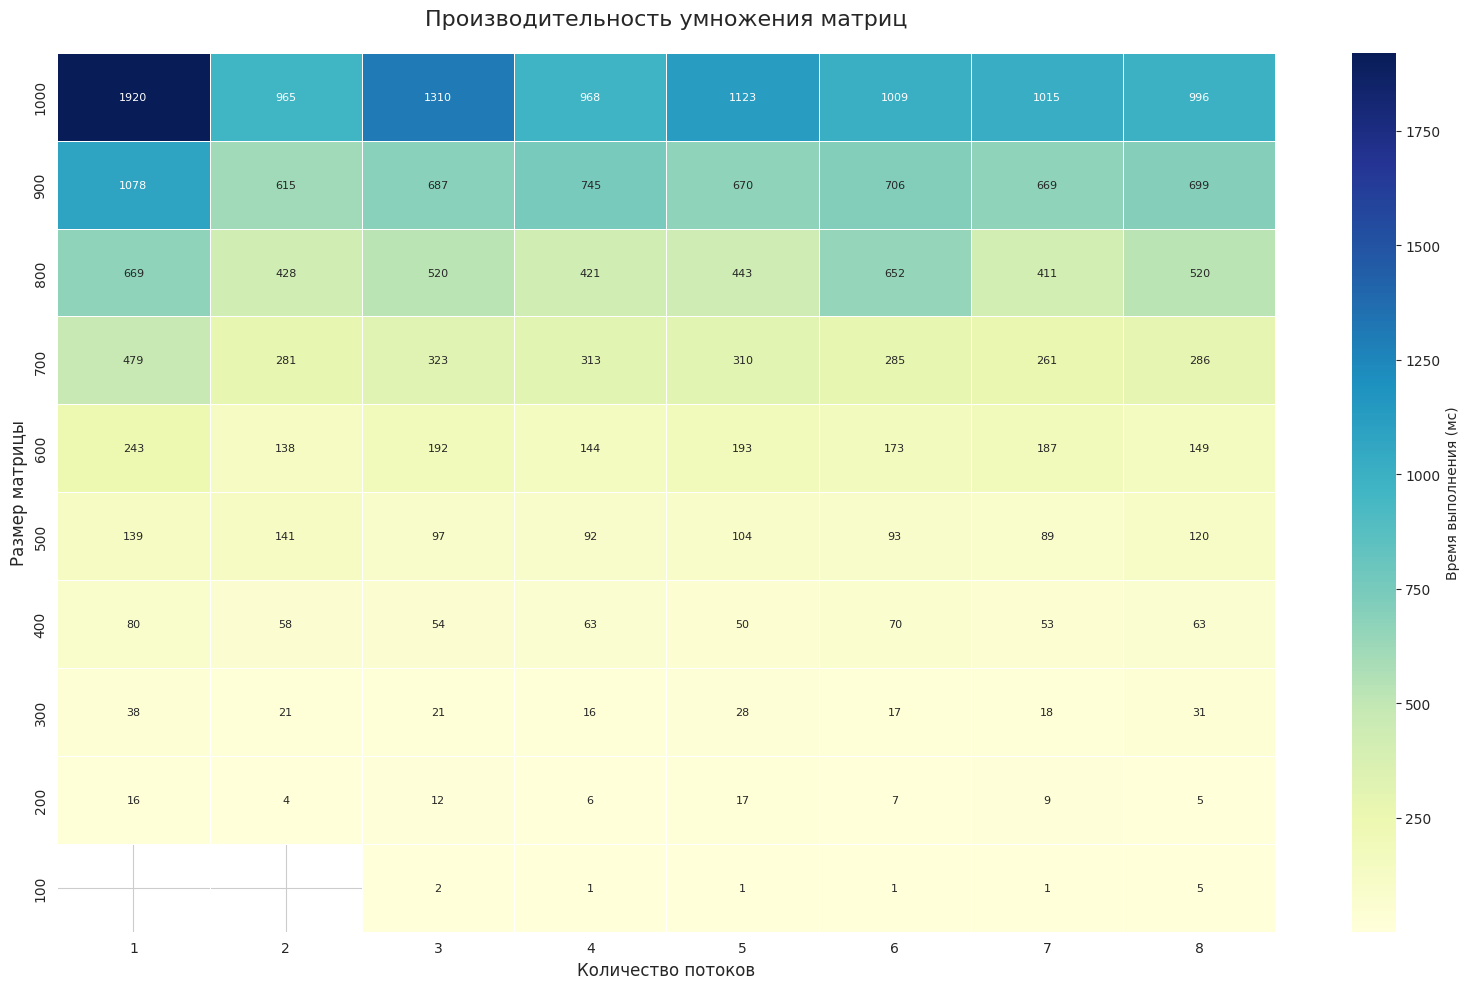


Оптимальные настройки для каждого размера:
1000: 2 потоков (965 мс)
900: 2 потоков (615 мс)
800: 7 потоков (411 мс)
700: 7 потоков (261 мс)
600: 2 потоков (138 мс)
500: 7 потоков (89 мс)
400: 5 потоков (50 мс)
300: 4 потоков (16 мс)
200: 2 потоков (4 мс)
100: 4 потоков (1 мс)

Максимальное ускорение:
Dimension
100     5.000000
200     4.250000
300     2.375000
1000    1.989637
700     1.835249


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def display_csv_and_heatmap_analysis(csv_path='benchmark_results.csv', plot_path='performance_heatmap.png'):
    if not os.path.exists(csv_path):
        print(f"Файл {csv_path} не найден!")
        return

    df = pd.read_csv(csv_path)

    df['Time (ms)'] = df['Multiplication Time (s)'] * 1000
    df = df[df['Time (ms)'] > 0]

    heatmap_data = df.pivot_table(
        index='Dimension',
        columns='Threads',
        values='Time (ms)',
        aggfunc=np.mean
    ).sort_index(ascending=False)

    plt.figure(figsize=(16, 10))
    sns.set_style("whitegrid")
    plt.rcParams['font.family'] = 'DejaVu Sans'

    ax = sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".0f",
        cmap="YlGnBu",
        linewidths=0.5,
        cbar_kws={'label': 'Время выполнения (мс)'},
        annot_kws={"size": 8}
    )

    plt.title('Производительность умножения матриц', fontsize=16, pad=20)
    plt.xlabel('Количество потоков', fontsize=12)
    plt.ylabel('Размер матрицы', fontsize=12)
    plt.tight_layout()

    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.show()


    optimal_threads = heatmap_data.idxmin(axis=1)
    optimal_times = heatmap_data.min(axis=1)

    print("\nОптимальные настройки для каждого размера:")
    for dim in heatmap_data.index:
        print(f"{dim}: {optimal_threads[dim]} потоков ({optimal_times[dim]:.0f} мс)")

    speedup = heatmap_data.max(axis=1) / heatmap_data.min(axis=1)
    print("\nМаксимальное ускорение:")
    print(speedup.sort_values(ascending=False).head(5).to_string())

    efficiency = pd.DataFrame()
    for dim in heatmap_data.index:
        base_time = heatmap_data.loc[dim, 1]
        for thread in heatmap_data.columns:
            if thread == 1:
                efficiency.loc[dim, thread] = 1.0
            else:
                efficiency.loc[dim, thread] = (base_time / heatmap_data.loc[dim, thread]) / thread




display_csv_and_heatmap_analysis()


